In [1]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas as pd
from scipy import stats

In [24]:
table1 = input()
table2 = input()

 Watershed.csv
 Table 3.csv


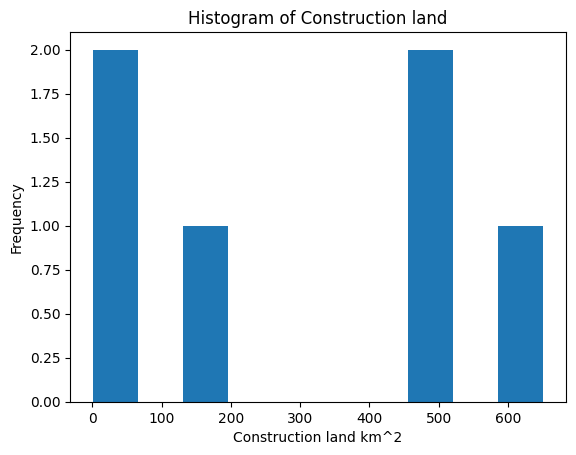

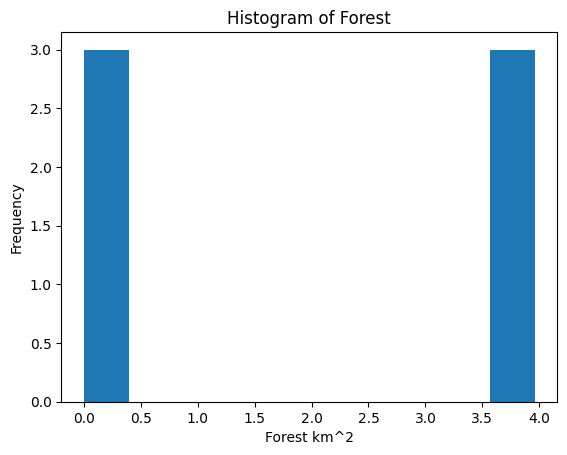

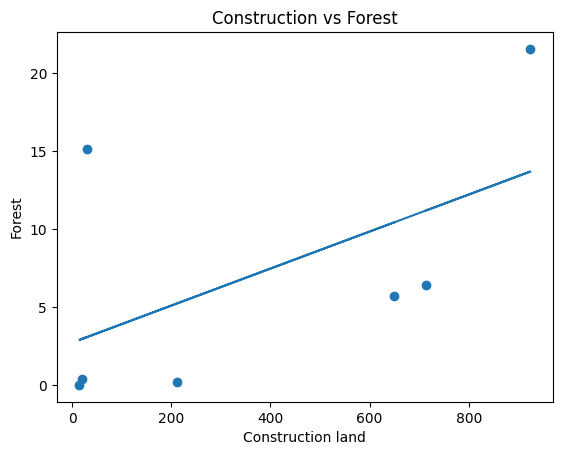

PC1 variance (%): 99.97197851688333
PC2 variance (%): 0.02802148311667953


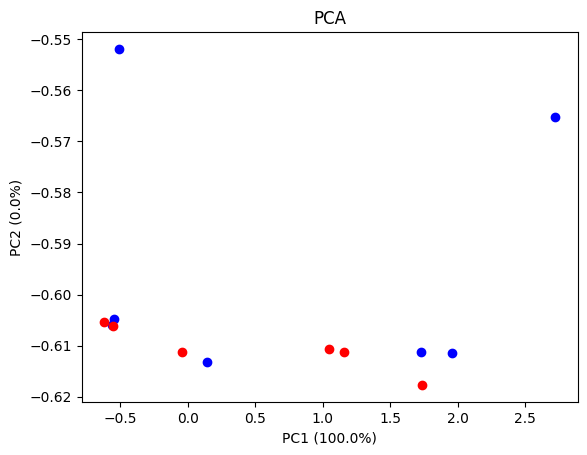

In [57]:
sheet = open(table1, "r")
construction = []
forest = []
first = True
header1 = ""
for line in sheet: 
    if first == True:
        data = line.split(",")
        header1 = data
        first = False
    else:
        data = line.split(",")
        if data[3] == "Construction land":
            continue
        construction.append(float(data[3]))
        forest.append(float(data[5]))

sheet2 = open(table2, "r")
construction2 = []
forest2 = []
first = True
header2 = ""
for line in sheet2: 
    if first == True:
        data = line.split(",")
        header2 = data
        first = False
    else:
        data = line.split(",")
        if data[2] == "Construction land":
            continue
        if data[4] == "":
            continue
        construction2.append(float(data[2]))
        forest2.append(float(data[4]))
constructionNP1 = np.array(construction)
forestNP1 = np.array(forest)
constructionNP2 = np.array(construction2)
forestNP2 = np.array(forest2)

plt.figure()
plt.hist(constructionNP2)
plt.title("Histogram of Construction land")
plt.xlabel("Construction land km^2")
plt.ylabel("Frequency")
plt.show()
plt.figure()
plt.hist(forestNP2)
plt.title("Histogram of Forest")
plt.xlabel("Forest km^2")
plt.ylabel("Frequency")
plt.show()



r = np.corrcoef(constructionNP1, forestNP1)
x, y = np.polyfit(constructionNP1, forestNP1, 1)
plt.figure()
plt.scatter(constructionNP1, forestNP1)
plt.plot(constructionNP1, x * constructionNP1 + y)
plt.title("Construction vs Forest")
plt.xlabel("Construction land")
plt.ylabel("Forest")
plt.show()



a = np.column_stack((constructionNP1, forestNP1))
b = np.column_stack((constructionNP2, forestNP2))
c = np.vstack((a,b))
mean = c.mean()
stdv = c.std()
C = (c - mean) / stdv

cov = np.cov(C.T)


eigvals, eigvecs = np.linalg.eig(cov)


order   = np.argsort(eigvals)[::-1]
eigvals = eigvals[order]
eigvecs = eigvecs[:, order]


pc1_var = eigvals[0] / (eigvals[0] + eigvals[1]) * 100
pc2_var = eigvals[1] / (eigvals[0] + eigvals[1]) * 100
print("PC1 variance (%):", pc1_var)
print("PC2 variance (%):", pc2_var)


PCs = C @ eigvecs          
PC1 = PCs[:, 0]
PC2 = PCs[:, 1]

n1 = len(a)        
n2 = len(b)       

PC1_w = PC1[:n1]
PC2_w = PC2[:n1]

PC1_c = PC1[n1:]
PC2_c = PC2[n1:]

plt.figure()
plt.scatter(PC1_w, PC2_w, color="blue", label="Watershed")
plt.scatter(PC1_c, PC2_c, color="red", label="City")

plt.xlabel("PC1 (" + str(round(pc1_var, 1)) + "%)")
plt.ylabel("PC2 (" + str(round(pc2_var, 1)) + "%)")
plt.title("PCA")
plt.show()